## 深入浅出pandas-1

Pandas 是 Wes McKinney 在2008年开发的一个强大的**分析结构化数据**的工具集。Pandas 以 NumPy 为基础（实现数据存储和运算），提供了专门用于数据分析的类型、方法和函数，对数据分析和数据挖掘提供了很好的支持；同时 pandas 还可以跟数据可视化工具 matplotlib 很好的整合在一起，非常轻松愉快的实现数据可视化呈现。

Pandas 核心的数据类型是`Series`（数据系列）、`DataFrame`（数据窗/数据框），分别用于处理一维和二维的数据，除此之外，还有一个名为`Index`的类型及其子类型，它们为`Series`和`DataFrame`提供了索引功能。日常工作中`DataFrame`使用得最为广泛，因为二维的数据结构刚好可以对应有行有列的表格。`Series`和`DataFrame`都提供了大量的处理数据的方法，数据分析师以此为基础，可以实现对数据的筛选、合并、拼接、清洗、预处理、聚合、透视和可视化等各种操作。

### 创建Series对象

Pandas 库中的`Series`对象可以用来表示一维数据结构，但是多了索引和一些额外的功能。`Series`类型的内部结构包含了两个数组，其中一个用来保存数据，另一个用来保存数据的索引。我们可以通过列表或数组创建`Series`对象，代码如下所示。

In [1]:
import numpy as np
import pandas as pd

ser1 = pd.Series(data=[120, 380, 250, 360], index=['一季度', '二季度', '三季度', '四季度']) #map
ser1

一季度    120
二季度    380
三季度    250
四季度    360
dtype: int64

> **说明**：`Series`构造器中的`data`参数表示数据，`index`参数表示数据的索引，相当于数据对应的标签。

In [2]:
ser2 = pd.Series({'一季度': 320, '二季度': 180, '三季度': 300, '四季度': 405})
ser2

一季度    320
二季度    180
三季度    300
四季度    405
dtype: int64

> **说明**：通过字典创建`Series`对象时，字典的键就是数据的标签（索引），键对应的值就是数据。

### Series对象的运算

#### 标量运算

我们尝试给刚才的`ser1`每个季度加上`10`，代码如下所示。

In [3]:
ser1 += 10
ser1

一季度    130
二季度    390
三季度    260
四季度    370
dtype: int64

#### 矢量运算

我们尝试把`ser1`和`ser2`对应季度的数据加起来，代码如下所示。

In [4]:
ser1 + ser2

一季度    450
二季度    570
三季度    560
四季度    775
dtype: int64

#### 索引运算

##### 普通索引

跟数组一样，`Series`对象也可以进行索引和切片操作，不同的是`Series`对象因为内部维护了一个保存索引的数组，所以除了可以使用整数索引检索数据外，还可以通过自己设置的索引（标签）获取对应的数据。

使用整数索引。

In [5]:
ser1.iloc[2] #ser1[2]

260

In [6]:
ser1['三季度']

260

In [7]:
ser1['一季度'] = 380
ser1

一季度    380
二季度    390
三季度    260
四季度    370
dtype: int64

##### 切片索引

`Series`对象的切片操作跟列表、数组类似，通过给出起始和结束索引，从原来的`Series`对象中取出或修改部分数据，这里也可以使用整数索引和自定义的索引，代码如下所示。

In [8]:
ser2[1:3]

二季度    180
三季度    300
dtype: int64

In [9]:
ser2['二季度':'四季度']

二季度    180
三季度    300
四季度    405
dtype: int64

>**提示**：在使用自定义索引进行切片时，结束索引对应的元素也是可以取到的。

In [10]:
ser2[1:3] = 400, 500
ser2

一季度    320
二季度    400
三季度    500
四季度    405
dtype: int64

#### 花式索引

In [11]:
ser2[['二季度', '四季度']]

二季度    400
四季度    405
dtype: int64

In [12]:
ser2[['二季度', '四季度']] = 600, 520
ser2

一季度    320
二季度    600
三季度    500
四季度    520
dtype: int64

In [13]:
ser2[ser2 >= 500]

二季度    600
三季度    500
四季度    520
dtype: int64

### Series对象的属性和方法

`Series`对象的属性和方法非常多，我们就捡着重要的跟大家讲吧。先看看下面的表格，它展示了`Series`对象常用的属性。

| 属性                      | 说明                                    |
| ------------------------- | --------------------------------------- |
| `dtype` / `dtypes`        | 返回`Series`对象的数据类型              |
| `hasnans`                 | 判断`Series`对象中有没有空值            |
| `at` / `iat`              | 通过索引访问`Series`对象中的单个值      |
| `loc` / `iloc`            | 通过索引访问`Series`对象中的单个值或一组值 |
| `index`                   | 返回`Series`对象的索引（`Index`对象）     |
| `is_monotonic`            | 判断`Series`对象中的数据是否单调        |
| `is_monotonic_increasing` | 判断`Series`对象中的数据是否单调递增    |
| `is_monotonic_decreasing` | 判断`Series`对象中的数据是否单调递减    |
| `is_unique`               | 判断`Series`对象中的数据是否独一无二    |
| `size`                    | 返回`Series`对象中元素的个数            |
| `values`                  | 以`ndarray`的方式返回`Series`对象中的值（`ndarray`对象） |

我们可以通过下面的代码来了解`Series`对象的属性。

In [14]:
print(ser2.dtype)                    # 数据类型 data
print(ser2.hasnans)                  # 有没有空值 has nans 
print(ser2.index)                    # 索引
print(ser2.values)                   # 值
print(ser2.is_monotonic_increasing)  # 是否单调递增
print(ser2.is_unique)                # 是否每个值都独一无二

int64
False
Index(['一季度', '二季度', '三季度', '四季度'], dtype='object')
[320 600 500 520]
False
True


`Series`对象的方法很多，下面我们通过一些代码片段为大家介绍常用的方法。

#### 统计相关

`Series`对象支持各种获取描述性统计信息的方法。

In [15]:
print(ser2.count())   # 计数
print(ser2.sum())     # 求和
print(ser2.mean())    # 求平均
print(ser2.median())  # 找中位数
print(ser2.max())     # 找最大
print(ser2.min())     # 找最小
print(ser2.std())     # 求标准差
print(ser2.var())     # 求方差

4
1940
485.0
510.0
600
320
118.18065267490557
13966.666666666666


`Series`对象还有一个名为`describe()`的方法，可以获得上述所有的描述性统计信息，如下所示。

In [16]:
ser2.describe()

count      4.000000
mean     485.000000
std      118.180653
min      320.000000
25%      455.000000
50%      510.000000
75%      540.000000
max      600.000000
dtype: float64

> **提示**：因为`describe()`返回的也是一个`Series`对象，所以也可以用`ser2.describe()['mean']`来获取平均值，用`ser2.describe()[['max', 'min']]`来获取最大值和最小值。

如果`Series`对象有重复的值，我们可以使用`unique()`方法获得由独一无二的值构成的数组；可以使用`nunique()`方法统计不重复值的数量；如果想要统计每个值重复的次数，可以使用`value_counts()`方法，这个方法会返回一个`Series`对象，它的索引就是原来的`Series`对象中的值，而每个值出现的次数就是返回的`Series`对象中的数据，在默认情况下会按照出现次数做降序排列，如下所示。

In [17]:
ser3 = pd.Series(data=['apple', 'banana', 'apple', 'pitaya', 'apple', 'pitaya', 'durian'])
ser3.value_counts()

apple     3
pitaya    2
banana    1
durian    1
Name: count, dtype: int64

In [18]:
ser3.nunique()

4

对于`ser3`，我们还可以用`mode()`方法来找出数据的众数，由于众数可能不唯一，所以`mode()`方法的返回值仍然是一个`Series`对象。

In [19]:
ser3.mode()

0    apple
dtype: object

#### 处理数据

`Series`对象的`isna()`和`isnull()`方法可以用于空值的判断，`notna()`和`notnull()`方法可以用于非空值的判断，代码如下所示。

In [20]:
ser4 = pd.Series(data=[10, 20, np.nan, 30, np.nan])
ser4.isna()

0    False
1    False
2     True
3    False
4     True
dtype: bool

> **说明**：`np.nan`是一个IEEE 754标准的浮点小数，专门用来表示“不是一个数”，在上面的代码中我们用它来代表空值；当然，也可以用 Python 中的`None`来表示空值，在 pandas 中`None`也会被处理为`np.nan`。

In [21]:
ser4.notna()

0     True
1     True
2    False
3     True
4    False
dtype: bool

`Series`对象的`dropna()`和`fillna()`方法分别用来删除空值和填充空值，具体的用法如下所示。

In [22]:
ser4.dropna()

0    10.0
1    20.0
3    30.0
dtype: float64

In [23]:
ser4.fillna(value=40)  # 将空值填充为40

0    10.0
1    20.0
2    40.0
3    30.0
4    40.0
dtype: float64

需要提醒大家注意的是，`dropna()`和`fillna()`方法都有一个名为`inplace`的参数，它的默认值是`False`，表示删除空值或填充空值不会修改原来的`Series`对象，而是返回一个新的`Series`对象。如果将`inplace`参数的值修改为`True`，那么删除或填充空值会就地操作，直接修改原来的`Series`对象，此时方法的返回值是`None`。后面我们会接触到的很多方法，包括`DataFrame`对象的很多方法都会有这个参数，它们的意义跟这里是一样的。

`Series`对象的`mask()`和`where()`方法可以将满足或不满足条件的值进行替换，如下所示。

In [24]:
ser5 = pd.Series(range(5))
ser5.where(ser5 > 0)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [25]:
ser5.where(ser5 > 1, 10)

0    10
1    10
2     2
3     3
4     4
dtype: int64

In [26]:
ser5.mask(ser5 > 1, 10)

0     0
1     1
2    10
3    10
4    10
dtype: int64

`Series`对象的`duplicated()`方法可以帮助我们找出重复的数据，而`drop_duplicates()`方法可以帮我们删除重复数据。

In [27]:
ser3.duplicated()

0    False
1    False
2     True
3    False
4     True
5     True
6    False
dtype: bool

In [28]:
ser3.drop_duplicates()

0     apple
1    banana
3    pitaya
6    durian
dtype: object

`Series`对象的`apply()`和`map()`方法非常重要，它们可以通过字典或者指定的函数来处理数据，把数据映射或转换成我们想要的样子。这两个方法在数据准备阶段非常重要，我们先来试一试这个名为`map`的方法。

In [29]:
ser6 = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
ser6

0       cat
1       dog
2       NaN
3    rabbit
dtype: object

In [30]:
ser6.map({'cat': 'kitten', 'dog': 'puppy'})

0    kitten
1     puppy
2       NaN
3       NaN
dtype: object

> **说明**：通过字典给出的映射规则对数据进行处理。

In [31]:
ser6.map('I am a {}'.format, na_action='ignore')

0       I am a cat
1       I am a dog
2              NaN
3    I am a rabbit
dtype: object

> **说明**：将指定字符串的`format`方法作用到数据系列的数据上，忽略掉所有的空值。

我们创建一个新的`Series`对象，

In [32]:
ser7 = pd.Series([20, 21, 12],  index=['London', 'New York', 'Helsinki'])
ser7

London      20
New York    21
Helsinki    12
dtype: int64

In [33]:
ser7.apply(np.square)

London      400
New York    441
Helsinki    144
dtype: int64

> **说明**：将求平方的函数作用到数据系列的数据上，也可以将参数`np.square`替换为`lambda x: x ** 2`。

In [34]:
ser7.apply(lambda x, value: x - value, args=(5, ))

London      15
New York    16
Helsinki     7
dtype: int64

> 注意：上面`apply`方法中的`lambda`函数有两个参数，第一个参数是数据系列中的数据，而第二个参数需要我们传入，所以我们给`apply`方法增加了`args`参数，用于给`lambda`函数的第二个参数传值。

#### 取头部值和排序

`Series`对象的`sort_index()`和`sort_values()`方法可以用于对索引和数据的排序，排序方法有一个名为`ascending`的布尔类型参数，该参数用于控制排序的结果是升序还是降序；而名为`kind`的参数则用来控制排序使用的算法，默认使用了`quicksort`，也可以选择`mergesort`或`heapsort`；如果存在空值，那么可以用`na_position`参数空值放在最前还是最后，默认是`last`，代码如下所示。

In [35]:
ser8 = pd.Series(
    data=[35, 96, 12, 57, 25, 89], 
    index=['grape', 'banana', 'pitaya', 'apple', 'peach', 'orange']
)
ser8.sort_values()  # 按值从小到大排序

pitaya    12
peach     25
grape     35
apple     57
orange    89
banana    96
dtype: int64

In [36]:
ser8.sort_index(ascending=False)  # 按索引从大到小排序

pitaya    12
peach     25
orange    89
grape     35
banana    96
apple     57
dtype: int64

如果要从`Series`对象中找出元素中最大或最小的“Top-N”，我们不需要对所有的值进行排序的，可以使用`nlargest()`和`nsmallest()`方法来完成，如下所示。

In [37]:
ser8.nlargest(3)  # 值最大的3个

banana    96
orange    89
apple     57
dtype: int64

In [38]:
ser8.nsmallest(2)  # 值最小的2个

pitaya    12
peach     25
dtype: int64

#### 绘制图表

`Series`对象有一个名为`plot`的方法可以用来生成图表，如果选择生成折线图、饼图、柱状图等，默认会使用`Series`对象的索引作为横坐标，使用`Series`对象的数据作为纵坐标。下面我们创建一个`Series`对象并基于它绘制柱状图，代码如下所示。

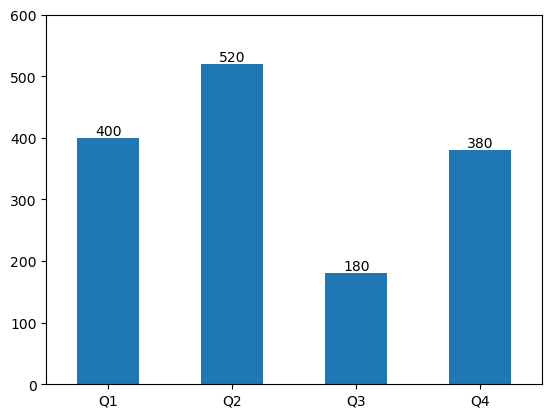

In [39]:
import matplotlib.pyplot as plt

ser9 = pd.Series({'Q1': 400, 'Q2': 520, 'Q3': 180, 'Q4': 380})
# 通过plot方法的kind指定图表类型为柱状图
ser9.plot(kind='bar')
# 定制纵轴的取值范围
plt.ylim(0, 600)
# 定制横轴刻度（旋转到0度）
plt.xticks(rotation=0)
# 为柱子增加数据标签
for i in range(ser9.size):
    plt.text(i, ser9.iloc[i] + 5, ser9.iloc[i], ha='center')
plt.show()

我们也可以将其绘制为饼图，代码如下所示。

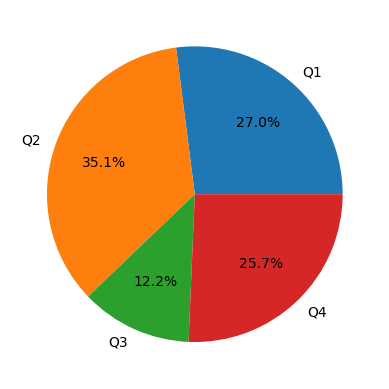

In [40]:
# plot方法的kind参数指定了图表类型为饼图
# autopct会自动计算并显示百分比
# pctdistance用来控制百分比到圆心的距离
ser9.plot(kind='pie', autopct='%.1f%%', pctdistance=0.65)
plt.show()